

Here we will try to predict how many suicides may happen in  different states due to different factors

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [9]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Suicidee data/Suicides.csv')

# EDA

In [10]:
df.head(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
5,A & N Islands,2001,Causes,Family Problems,Female,0-14,0
6,A & N Islands,2001,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
7,A & N Islands,2001,Causes,Other Prolonged Illness,Female,0-14,0
8,A & N Islands,2001,Causes,Property Dispute,Female,0-14,0
9,A & N Islands,2001,Causes,Fall in Social Reputation,Female,0-14,0


In [11]:
df.shape

(237519, 7)

In [12]:
df.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [13]:
df['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [14]:
df['Type_code'].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [15]:
df['Type'].unique()

array(['Illness (Aids/STD)', 'Bankruptcy or Sudden change in Economic',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children(Barrenness/Impotency',
       'Causes Not known', 'Unemployment',
       'Other Causes (Please Specity)', 'Poverty', 'Death of Dear Person',
       'Cancer', 'Suspected/Illicit Relation', 'Paralysis', 'Diploma',
       'No Education', 'Post Graduate and Above', 'Middle', 'Graduate',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Primary',
       'Matriculate/Secondary', 'By Consuming Insecticides', 'By Hanging',
       'By Jumping from (Other sites)'

In [16]:
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012])

In [17]:
df[df['Type_code']=='Education_Status']

,State,Year,Type_code,Type,Gender,Age_group,Total
260,A & N Islands,2001,Education_Status,Diploma,Female,0-100+,0
261,A & N Islands,2001,Education_Status,No Education,Female,0-100+,4
262,A & N Islands,2001,Education_Status,Post Graduate and Above,Female,0-100+,0
263,A & N Islands,2001,Education_Status,Middle,Female,0-100+,33
264,A & N Islands,2001,Education_Status,Graduate,Female,0-100+,0
...,...,...,...,...,...,...,...
237234,West Bengal,2012,Education_Status,Primary,Male,0-100+,2983
237235,West Bengal,2012,Education_Status,No Education,Male,0-100+,1096
237236,West Bengal,2012,Education_Status,Middle,Male,0-100+,2467
237237,West Bengal,2012,Education_Status,Graduate,Male,0-100+,242


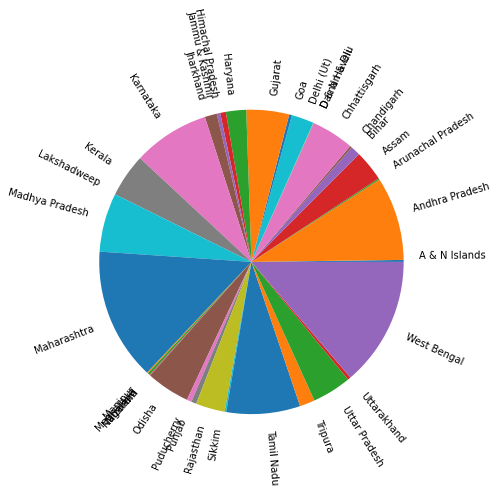

In [18]:
# Total No of students who commited suicide in different states due to education
def studentSuicide():
  data={}
  for i in range(0,len(df)):
    if df['Type'][i]=='Student' and df['Type_code'][i]=="Professional_Profile":
      if df['State'][i] in data.keys():
        data[df['State'][i]]=data[df['State'][i]]+df['Total'][i]
      else:
        data[df['State'][i]]=df['Total'][i]
  return data

data=studentSuicide()
labels=list(data.keys())
data=list(data.values())
plt.figure(figsize=(14,7))
plt.pie(data,labels=labels,rotatelabels=92)
plt.show()

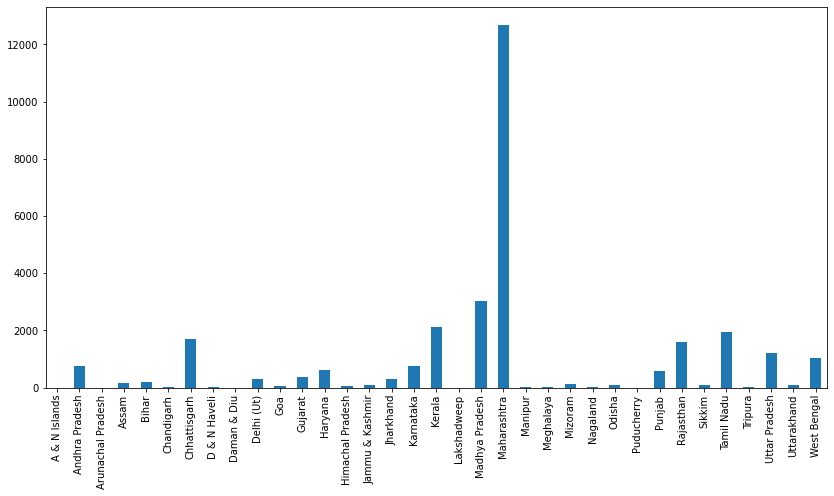

In [19]:
# Total No of students who commited suicide in different states due to drugs
def studentSuicide():
  data={}
  for i in range(0,len(df)):
    if df['Type'][i]=="Drug Abuse/Addiction":
      if df['State'][i] in data.keys():
        data[df['State'][i]]=data[df['State'][i]]+df['Total'][i]
      else:
        data[df['State'][i]]=df['Total'][i]
  return data

data=studentSuicide()
data=pd.Series(data)
plt.figure(figsize=(14,7))
data.plot(kind='bar')
plt.show()

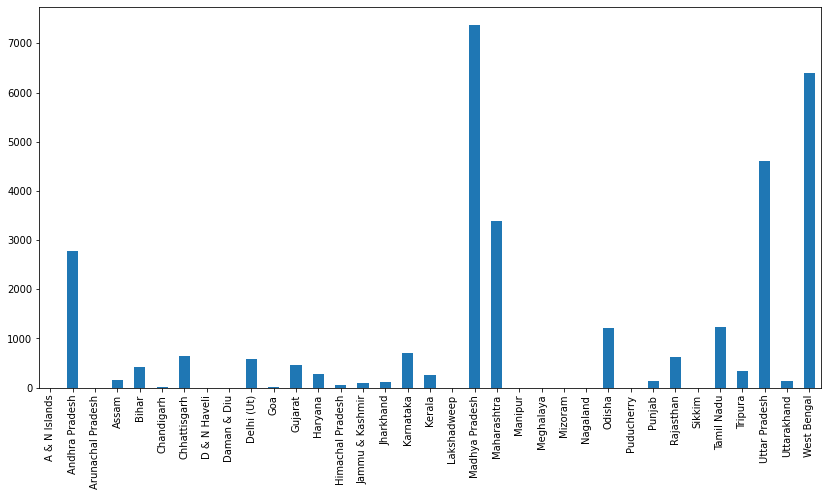

In [20]:
# Total No of students who commited suicide in different states dowry dispute
def studentSuicide():
  data={}
  for i in range(0,len(df)):
    if df['Type'][i]=="Dowry Dispute":
      if df['State'][i] in data.keys():
        data[df['State'][i]]=data[df['State'][i]]+df['Total'][i]
      else:
        data[df['State'][i]]=df['Total'][i]
  return data

data=studentSuicide()
data=pd.Series(data)
plt.figure(figsize=(14,7))
data.plot(kind='bar')
plt.show()

In [21]:
#Checking total null values
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [22]:
# Rows where total number of suicides commited is 0
df[df['Total']==0]

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237504,West Bengal,2012,Professional_Profile,Farming/Agriculture Activity,Male,60+,0
237505,West Bengal,2012,Professional_Profile,Student,Male,60+,0
237506,West Bengal,2012,Professional_Profile,Service (Private),Male,60+,0
237507,West Bengal,2012,Professional_Profile,Professional Activity,Male,60+,0


In [23]:
# Replacing the 0 with nan
df['Total']=df['Total'].replace(0,np.NaN)

In [24]:
df['Total']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
237514     149.0
237515     233.0
237516    5451.0
237517     189.0
237518    2658.0
Name: Total, Length: 237519, dtype: float64

In [25]:
# Now again checking the number of null values
df.isnull().sum()

State             0
Year              0
Type_code         0
Type              0
Gender            0
Age_group         0
Total        135481
dtype: int64

In [26]:
# Dropping the nnan values
# We are dropping the values where the total suicide is 0, because we don't want our model
# to be biased towards 0 because most of the values might be zero, we want our model to predict 
# a definite number so we will be on the safer side and can take certain actions

df.dropna(axis=0,inplace=True)

In [27]:
# Resetting the index
df=df.reset_index().drop(columns='index')

In [28]:
#New shape
df.shape

(102038, 7)

In [29]:
df.describe()

,Year,Total
count,102038.000000,102038.000000
mean,2006.546600,128.106529
std,3.456744,1205.621940
min,2001.000000,1.000000
25%,2004.000000,2.000000
50%,2007.000000,9.000000
75%,2010.000000,39.000000
max,2012.000000,63343.000000


In [30]:
# Checing the max value of total
# Since presence of these rows might harm the accuracy of models so we will drop them
# They just imply the total number of suicides that happened in the country due to various type_codes
df[df['Total']==df['Total'].max()]

,State,Year,Type_code,Type,Gender,Age_group,Total
86974,Total (All India),2012,Social_Status,Married,Male,0-100+,63343.0


In [31]:
df[df['State']=='Total (All India)']

,State,Year,Type_code,Type,Gender,Age_group,Total
86667,Total (All India),2001,Education_Status,Hr. Secondary/Intermediate/Pre-Universit,Female,0-100+,2391.0
86668,Total (All India),2001,Education_Status,Diploma,Female,0-100+,294.0
86669,Total (All India),2001,Education_Status,Matriculate/Secondary,Female,0-100+,5486.0
86670,Total (All India),2001,Education_Status,No Education,Female,0-100+,12817.0
86671,Total (All India),2001,Education_Status,Post Graduate and Above,Female,0-100+,192.0
...,...,...,...,...,...,...,...
86974,Total (All India),2012,Social_Status,Married,Male,0-100+,63343.0
86975,Total (All India),2012,Social_Status,Never Married,Male,0-100+,19727.0
86976,Total (All India),2012,Social_Status,Divorcee,Male,0-100+,682.0
86977,Total (All India),2012,Social_Status,Seperated,Male,0-100+,2043.0


In [32]:
df[df['State']=='Total (States)']

,State,Year,Type_code,Type,Gender,Age_group,Total
86979,Total (States),2001,Education_Status,Primary,Female,0-100+,11118.0
86980,Total (States),2001,Education_Status,Hr. Secondary/Intermediate/Pre-Universit,Female,0-100+,2315.0
86981,Total (States),2001,Education_Status,Middle,Female,0-100+,8838.0
86982,Total (States),2001,Education_Status,Matriculate/Secondary,Female,0-100+,5382.0
86983,Total (States),2001,Education_Status,No Education,Female,0-100+,12669.0
...,...,...,...,...,...,...,...
87286,Total (States),2012,Social_Status,Seperated,Male,0-100+,2001.0
87287,Total (States),2012,Social_Status,Widowed/Widower,Male,0-100+,2651.0
87288,Total (States),2012,Social_Status,Divorcee,Male,0-100+,680.0
87289,Total (States),2012,Social_Status,Never Married,Male,0-100+,19158.0


In [33]:
df[df['State']=='Total (Uts)']

,State,Year,Type_code,Type,Gender,Age_group,Total
87291,Total (Uts),2001,Education_Status,No Education,Female,0-100+,148.0
87292,Total (Uts),2001,Education_Status,Matriculate/Secondary,Female,0-100+,104.0
87293,Total (Uts),2001,Education_Status,Hr. Secondary/Intermediate/Pre-Universit,Female,0-100+,76.0
87294,Total (Uts),2001,Education_Status,Graduate,Female,0-100+,13.0
87295,Total (Uts),2001,Education_Status,Post Graduate and Above,Female,0-100+,1.0
...,...,...,...,...,...,...,...
87590,Total (Uts),2012,Social_Status,Never Married,Male,0-100+,569.0
87591,Total (Uts),2012,Social_Status,Married,Male,0-100+,1220.0
87592,Total (Uts),2012,Social_Status,Divorcee,Male,0-100+,2.0
87593,Total (Uts),2012,Social_Status,Widowed/Widower,Male,0-100+,7.0


In [34]:
# Dropping all the rows having State as Toall all India, total states, total Uts
df.drop(np.arange(86667,87595),axis=0,inplace=True,errors='ignore')

In [ ]:
#new shape
df.shape

(102038, 7)

#### The Final dataset 

In [ ]:
df.head(7)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1.0
1,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1.0
2,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1.0
3,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1.0
4,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8.0
5,A & N Islands,2001,Causes,Causes Not known,Female,15-29,8.0
6,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,15-29,6.0


In [ ]:
#different age groups
df['Age_group'].unique()

array(['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'], dtype=object)

In [ ]:
#Changing the age group to T=teenager,A=adult,S=senior
df['Age_group'].replace(['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'],['T','A','A','A','S','S'],inplace=True)

In [ ]:
df['Age_group'].unique()

array(['T', 'A', 'S'], dtype=object)

In [ ]:
df.head(4)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Love Affairs,Female,T,1.0
1,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,T,1.0
2,A & N Islands,2001,Causes,Other Prolonged Illness,Male,T,1.0
3,A & N Islands,2001,Causes,Failure in Examination,Male,T,1.0


In [ ]:
df['Year']=pd.to_datetime(df['Year'],format='%Y')

In [ ]:
df['Year']=df['Year'].dt.year

In [ ]:
df['Year']

0         2001
1         2001
2         2001
3         2001
4         2001
          ... 
102033    2012
102034    2012
102035    2012
102036    2012
102037    2012
Name: Year, Length: 102038, dtype: int64

In [ ]:
X_obt=df.drop(columns=['Total','Year','Type_code'],axis=1)
Y=df['Total']

### handling categorical features

In [ ]:
# #Inspite of using this I will use pipeline and dump that pipeline so that it will help me in the predictions while running it with 
# #Flask

# X=pd.get_dummies(X_obt,columns=['State','Type','Gender','Age_group'])

In [ ]:
X.shape

(102038, 112)

##### Splitting and training model

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_obt, Y, test_size=0.30, random_state=20)

In [ ]:
X_test.head(3)

,State,Type,Gender,Age_group
60730,Maharashtra,Cancellation/Non-Settlement of Marriage,Male,A
85733,Tamil Nadu,Service (Government),Female,A
79468,Rajasthan,Causes Not known,Male,T


In [ ]:
rmse=[]
msle=[]

### Checking all the models

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
predictions=abs(model.predict(X_test).round())
#RMSE
rmse_obt=mean_squared_error(Y_test,predictions, squared=False)
#mean squared log loss
msle_obt=mean_squared_log_error(Y_test,predictions)
rmse.append(float(rmse_obt))
msle.append(float(msle_obt))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,Y_train)
predictions=abs(model.predict(X_test).round())
#RMSE
rmse_obt=mean_squared_error(Y_test,predictions, squared=False)
#mean squared log loss
msle_obt=mean_squared_log_error(Y_test,predictions)
rmse.append(float(rmse_obt))
msle.append(float(msle_obt))

In [ ]:
model=DecisionTreeRegressor()
model.fit(X_train,Y_train)
predictions=abs(model.predict(X_test).round())
#RMSE
rmse_obt=mean_squared_error(Y_test,predictions, squared=False)
#mean squared log loss
msle_obt=mean_squared_log_error(Y_test,predictions)
rmse.append(float(rmse_obt))
msle.append(float(msle_obt))

In [ ]:
import xgboost as xg 
xgb_r = xg.XGBRegressor()
xgb_r.fit(X_train,Y_train)
predictions=abs(xgb_r.predict(X_test).round())
#RMSE
rmse_obt=mean_squared_error(Y_test,predictions, squared=False)
#mean squared log loss
msle_obt=mean_squared_log_error(Y_test,predictions)
rmse.append(rmse_obt)
msle.append(msle_obt)

[09:15:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# from sklearn.svm import SVR
# model=SVR()
# model.fit(X_train,Y_train)
# predictions=abs(model.predict(X_test).round())
# #RMSE
# rmse_obt=mean_squared_error(Y_test,predictions, squared=False)
# #mean squared log loss
# msle_obt=mean_squared_log_error(Y_test,predictions)
# rmse.append(float(rmse_obt))
# msle.append(float(msle_obt))

In [ ]:
print({'Rmse':rmse,"Msle":msle})

{'Rmse': [1050.6470292133192, 141.5628904071103, 141.1415477295469, 368.5250259619077], 'Msle': [5.43972654202496, 0.47084481081606927, 0.4668975832735623, 3.529678445743093]}


From the data it is clear that the Decision Tree Regressor gives the least error

### Hyper parameter tuning

In [ ]:
# model = DecisionTreeRegressor()                    
# parameters = param_grid = {
#               "max_leaf_nodes": [4500,4900,4950,5000],
#               }
# LS_rs = GridSearchCV(estimator=model, param_grid=parameters, cv=5,scoring='neg_mean_squared_log_error')   #fit model to data
# LS_rs.fit(X_train, Y_train)
# print(f'The best value of parameters is :- {LS_rs.best_params_} and the best score is {LS_rs.best_score_}')

# New part(using pipeline to handle categorical feature and model)

### Finaly training the model with whole data

In [ ]:
# model=DecisionTreeRegressor(random_state=0,max_leaf_nodes=4900)
# model.fit(X,Y)

In [ ]:
new_pipeline=Pipeline([('enc',OneHotEncoder()),
                       ('model',DecisionTreeRegressor(random_state=0,max_leaf_nodes=4900))])

In [ ]:
new_pipeline.fit(X_train,Y_train)

Pipeline(steps=[('enc', OneHotEncoder()),
                ('model',
                 DecisionTreeRegressor(max_leaf_nodes=4900, random_state=0))])

In [ ]:
predictions=new_pipeline.predict(X_test).round()

In [ ]:
np.sqrt(mean_squared_error(Y_test,predictions))

### Dumping the model

In [ ]:
pickle.dump(new_pipeline,open('suicide_model_pipe.pkl','wb'))

In [ ]:
# #for loading
model=pickle.load(open('suicide_model_pipe.pkl','rb'))

### Some testing for  Deployment

In [ ]:
# X_obt.to_csv('new_deploy.csv',index=False)

In [ ]:
X_obt=pd.read_csv('new_deploy.csv')

In [ ]:
d={'State':['Assam'],'Type':['Dowry Dispute'],'Gender':['Female'],'Age_group':['A']}

In [ ]:
new_data=pd.DataFrame(data=d)

In [ ]:
df_final=pd.concat([X_obt,new_data],axis=0)

In [ ]:
df_final=df_final.reset_index()

In [ ]:
df_final.drop(columns='index',inplace=True)

In [ ]:
df_final_dummy=pd.get_dummies(df_final,columns=['State','Type','Gender','Age_group'])

In [ ]:
df_final_dummy.tail(3)
df_final_dummy.columns

Index(['State_A & N Islands', 'State_Andhra Pradesh',
       'State_Arunachal Pradesh', 'State_Assam', 'State_Bihar',
       'State_Chandigarh', 'State_Chhattisgarh', 'State_D & N Haveli',
       'State_Daman & Diu', 'State_Delhi (Ut)',
       ...
       'Type_Student', 'Type_Suspected/Illicit Relation', 'Type_Unemployed',
       'Type_Unemployment', 'Type_Widowed/Widower', 'Gender_Female',
       'Gender_Male', 'Age_group_A', 'Age_group_S', 'Age_group_T'],
      dtype='object', length=109)

In [ ]:
# a_chk=X.columns
# b_chk=df_final_dummy.columns
# for i in (0,112):
#     if b_chk[i] != a_chk[i]:
#         print(b_chk[i])

In [ ]:
model.predict(test).round()

In [ ]:
#     d={'State':['Assam'],'Type':['Dowry Dispute'],'Gender':['Female'],'Age_group':['T']}
#     new_data=pd.DataFrame(data=d)
#     df_final=pd.concat([X_obt,new_data],axis=0)
#     df_final=df_final.reset_index()
#     df_final.drop(columns='index',inplace=True)
#     df_final_dummy=pd.get_dummies(df_final,columns=['State','Type','Gender','Age_group'])
#     test=df_final_dummy.iloc[101110].values.reshape(1,-1)
#     prediction_test=model.predict(test).round()

In [ ]:
#R square
from sklearn.metrics import r2_score
r2_score(Y_test,predictions)
#Adjusted R square
print(1-(1-r2_score(Y_test, predictions))*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1)))

'2.3.0'

In [ ]:
X_train.shape

(70777, 109)

In [ ]:
X_train=np.array(X_train)

In [ ]:
#ANN
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential()
model.add(keras.layers.Dense(units=300,activation='relu',input_shape=(X_train.shape[0],X_train.shape[1])))
model.add(keras.layers.Dense(units=100,activation='relu'))
model.add(keras.layers.Dense(units=100,activation='relu'))
model.add(keras.layers.Dense(units=100,activation='relu'))
model.add(keras.layers.Dense(units=100,activation='relu'))
model.add(keras.layers.Dense(units=1))
model.compile(optimizer='adam',loss=tf.keras.losses.MeanAbsoluteError(),metrics=['mse'])
model.fit(X_train,Y_train,epochs=1)

2212/2212 [==============================] - 4s 2ms/step - loss: 33.8036 - mse: 17529.6172


In [ ]:
predictions=model.predict(X_test)

In [ ]:
predictions

array([[566.6475  ],
       [ 14.724484],
       [  2.046275],
       ...,
       [520.5844  ],
       [ 16.142767],
       [ 15.592174]], dtype=float32)

In [ ]:
Y_test

69154    699.0
931       20.0
21975      2.0
18593     14.0
55834      2.0
         ...  
71496      1.0
24882     18.0
52722    467.0
71362     12.0
5826      20.0
Name: Total, Length: 30333, dtype: float64

In [ ]:
#R square
from sklearn.metrics import r2_score
print(r2_score(Y_test,predictions))
#Adjusted R square
print(1-(1-r2_score(Y_test, predictions))*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1)))

0.9379276850549823
0.9377038197097483
